<a href="https://colab.research.google.com/github/colombiacoin/bogcoin/blob/master/NaiveBayes_JaimeLuna_IEBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CLASE 1

# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

In [3]:
# 2 - CARGA DEL FICHERO DE DATOS
file = '/content/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [4]:
# 2 - INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [5]:
# 2 - NUMERO DE VALORES UNICOS PARA CADA VARIABLE
data.agg(['nunique']).T

,nunique
ID,2126
b,979
e,1064
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87


In [6]:
# 2 -ELIMINAR COUMNAS NO NECESARIAS
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [7]:
# 3 - ANALISIS DESCRIPTIVO - NULOS
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

In [8]:
# 3 - MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERION
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


0    1655
1     471
Name: Target, dtype: int64


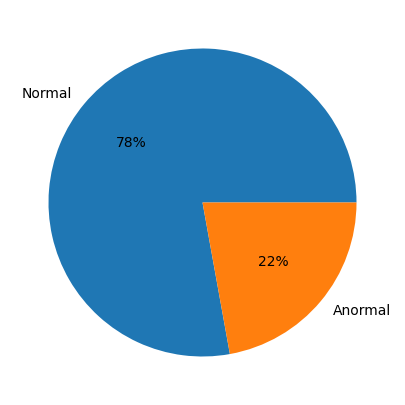

In [9]:
# 3 - DISTRIBUCION DE FRECUENCIAS DEL TARGET
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

<ipython-input-10-f7549fbd88eb>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


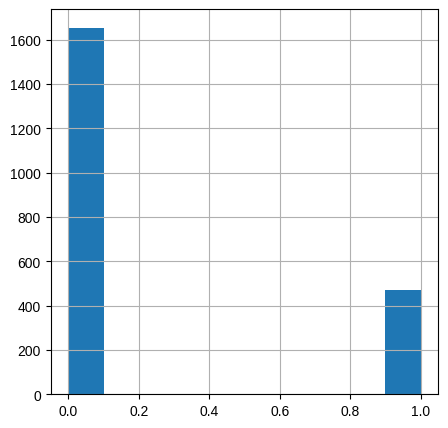

In [10]:
# 3 - HISTOGRAMA
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.style.use("seaborn")
data['Target'].hist(ax=ax);

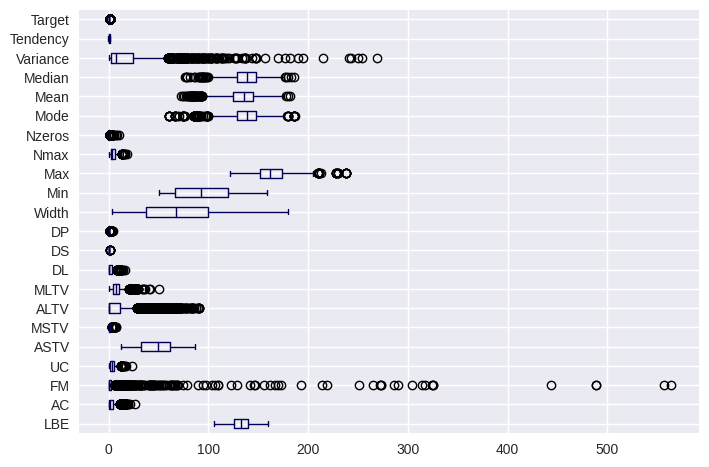

In [11]:
# BOX PLOT
data_box_plot = data.boxplot(vert=False, color = "#000054")

CLASE #2


<Axes: >

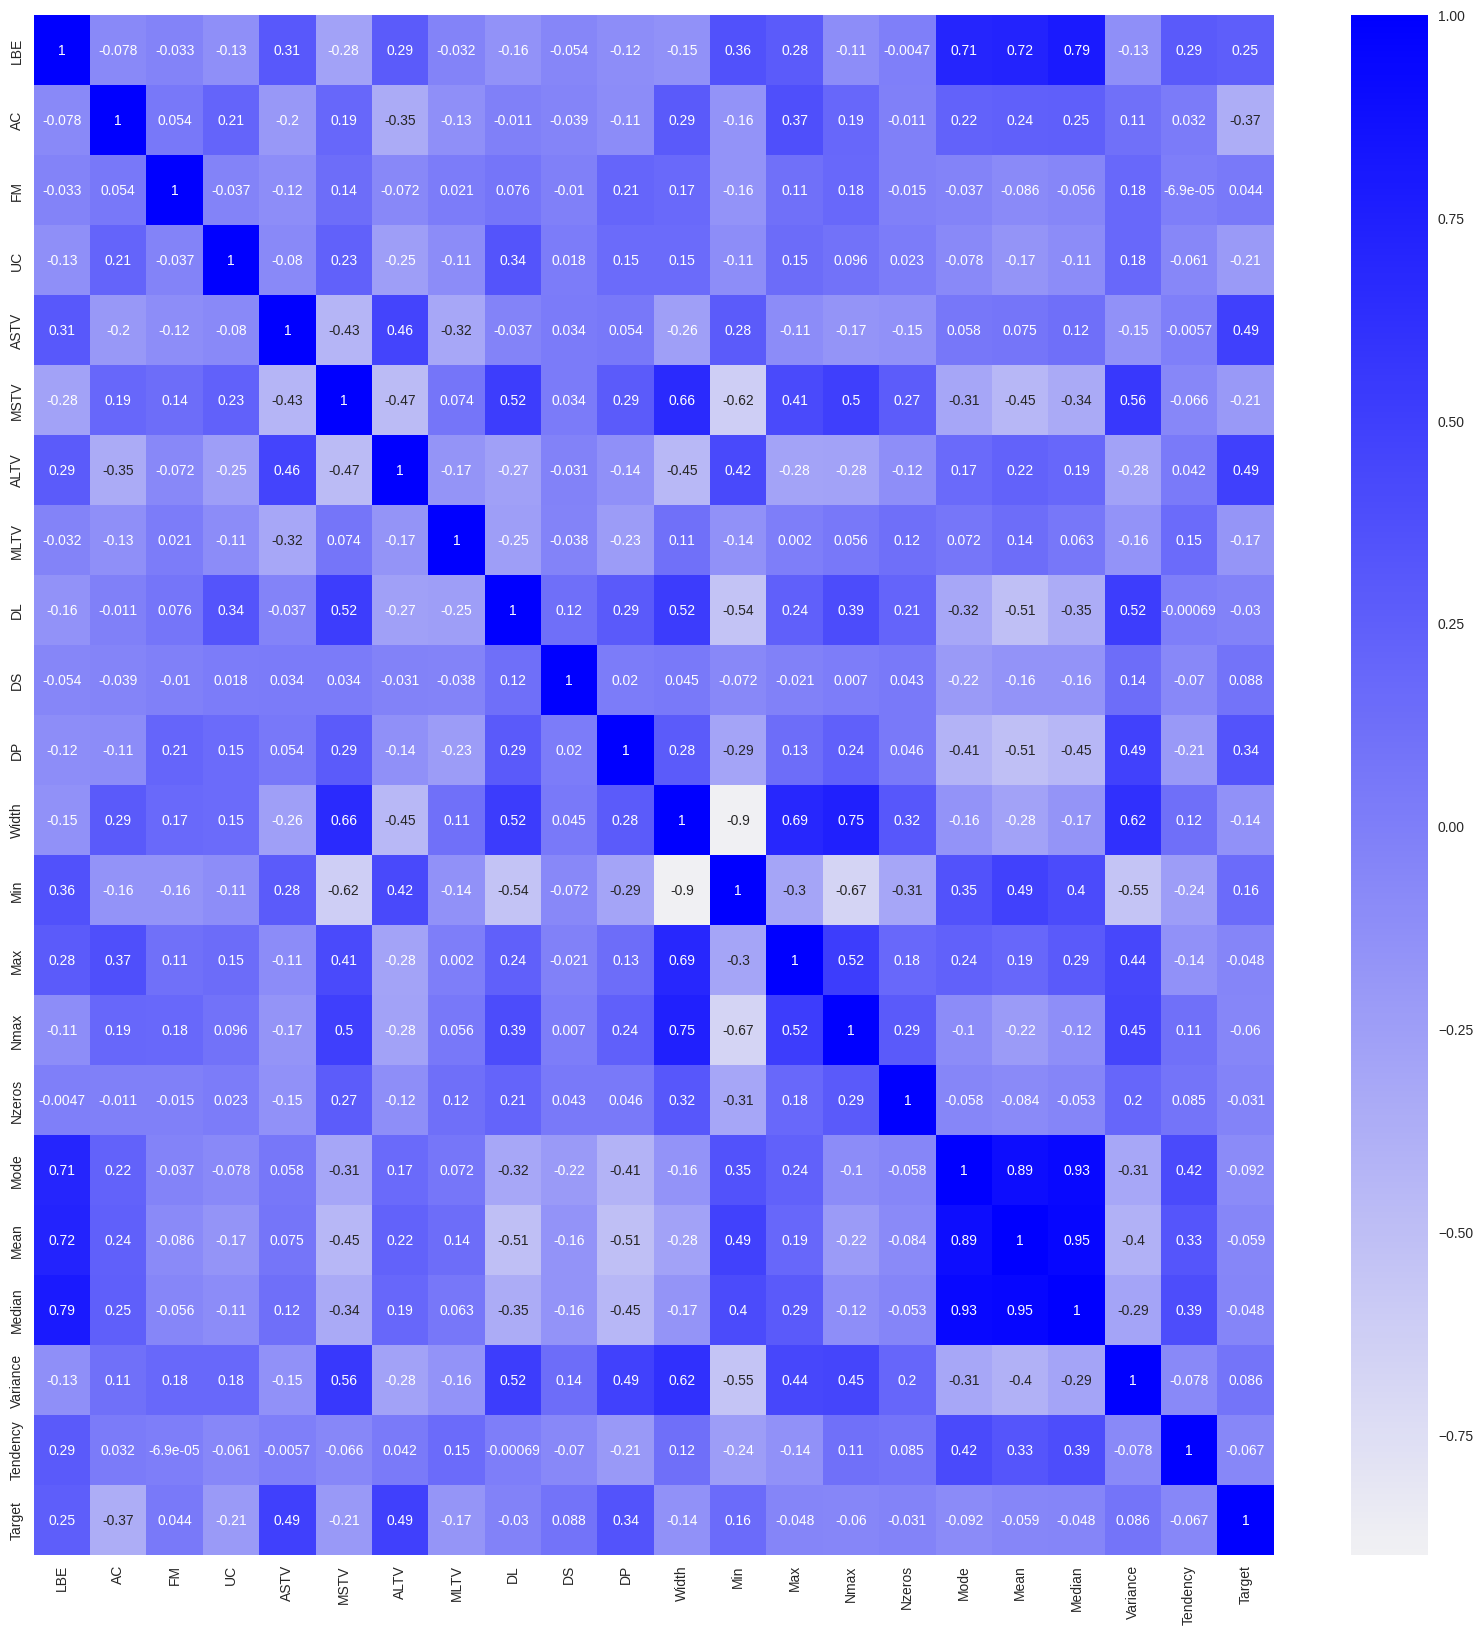

In [12]:
# 4 - MATRIZ DE CORRELACIONES
plt.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

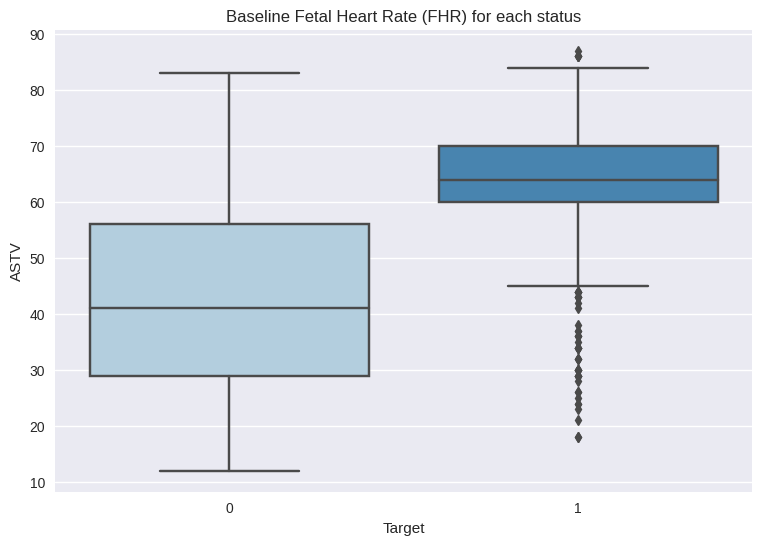

In [13]:
# 5 - RELACION UNIVARIANTE DEL TARGET CON LAS VARIABLES EXPLICATIVAS
plt.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'ASTV', data = data, palette="Blues")
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

In [22]:
#6 MUESTREO
# ENTRENAMIENTO Y TEST
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 510 to 1653
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       1063 non-null   int64  
 1   AC        1063 non-null   int64  
 2   FM        1063 non-null   int64  
 3   UC        1063 non-null   int64  
 4   ASTV      1063 non-null   int64  
 5   MSTV      1063 non-null   float64
 6   ALTV      1063 non-null   int64  
 7   MLTV      1063 non-null   float64
 8   DL        1063 non-null   int64  
 9   DS        1063 non-null   int64  
 10  DP        1063 non-null   int64  
 11  Width     1063 non-null   int64  
 12  Min       1063 non-null   int64  
 13  Max       1063 non-null   int64  
 14  Nmax      1063 non-null   int64  
 15  Nzeros    1063 non-null   int64  
 16  Mode      1063 non-null   int64  
 17  Mean      1063 non-null   int64  
 18  Median    1063 non-null   int64  
 19  Variance  1063 non-null   int64  
 20  Tendency  1063 non-null   in

In [17]:
print(X)

      LBE  AC  FM  UC  ASTV  MSTV  ALTV  MLTV  DL  DS  ...  Width  Min  Max  \
0     120   0   0   0    73   0.5    43   2.4   0   0  ...     64   62  126   
1     132   4   0   4    17   2.1     0  10.4   2   0  ...    130   68  198   
2     133   2   0   5    16   2.1     0  13.4   2   0  ...    130   68  198   
3     134   2   0   6    16   2.4     0  23.0   2   0  ...    117   53  170   
4     132   4   0   5    16   2.4     0  19.9   0   0  ...    117   53  170   
...   ...  ..  ..  ..   ...   ...   ...   ...  ..  ..  ...    ...  ...  ...   
2121  140   0   0   6    79   0.2    25   7.2   0   0  ...     40  137  177   
2122  140   1   0   9    78   0.4    22   7.1   0   0  ...     66  103  169   
2123  140   1   0   7    79   0.4    20   6.1   0   0  ...     67  103  170   
2124  140   1   0   9    78   0.4    27   7.0   0   0  ...     66  103  169   
2125  142   1   1   5    74   0.4    36   5.0   0   0  ...     42  117  159   

      Nmax  Nzeros  Mode  Mean  Median  Variance  T

In [20]:
print(y)

      Target
0          1
1          0
2          0
3          0
4          0
...      ...
2121       1
2122       1
2123       1
2124       1
2125       0

[2126 rows x 1 columns]


In [26]:
# MODELIZACION
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

modelNB = gnb.fit(X_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(X_train)
y_pred_test = modelNB.predict_proba(X_test)
print(y_pred_train)

[[1.00000000e+00 2.65887382e-22]
 [9.99920712e-01 7.92882322e-05]
 [1.81436719e-03 9.98185633e-01]
 ...
 [9.99997497e-01 2.50295747e-06]
 [9.99999999e-01 8.35298543e-10]
 [9.19375299e-01 8.06247011e-02]]


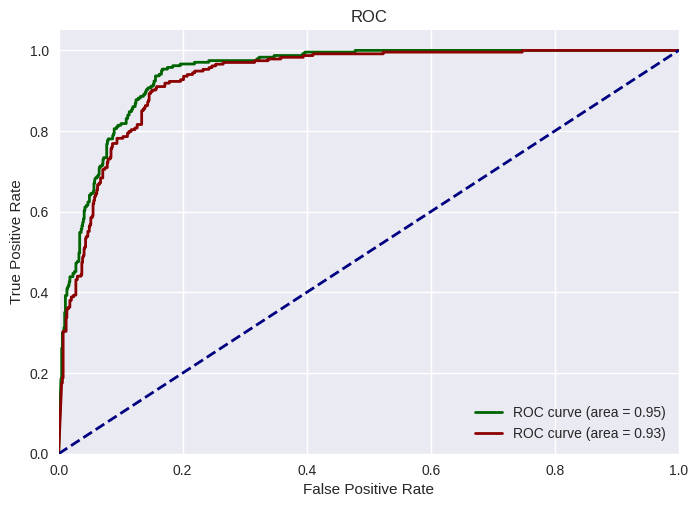

In [24]:
# # VALIDACION
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# CURVA ROC Y AUC PARA TRAINING
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# CURVA ROC Y AUC PARA TEST
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# GRAFICA
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()